In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colormaps

x_max = 400
y_max = 400

SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use("seaborn-v0_8-whitegrid")

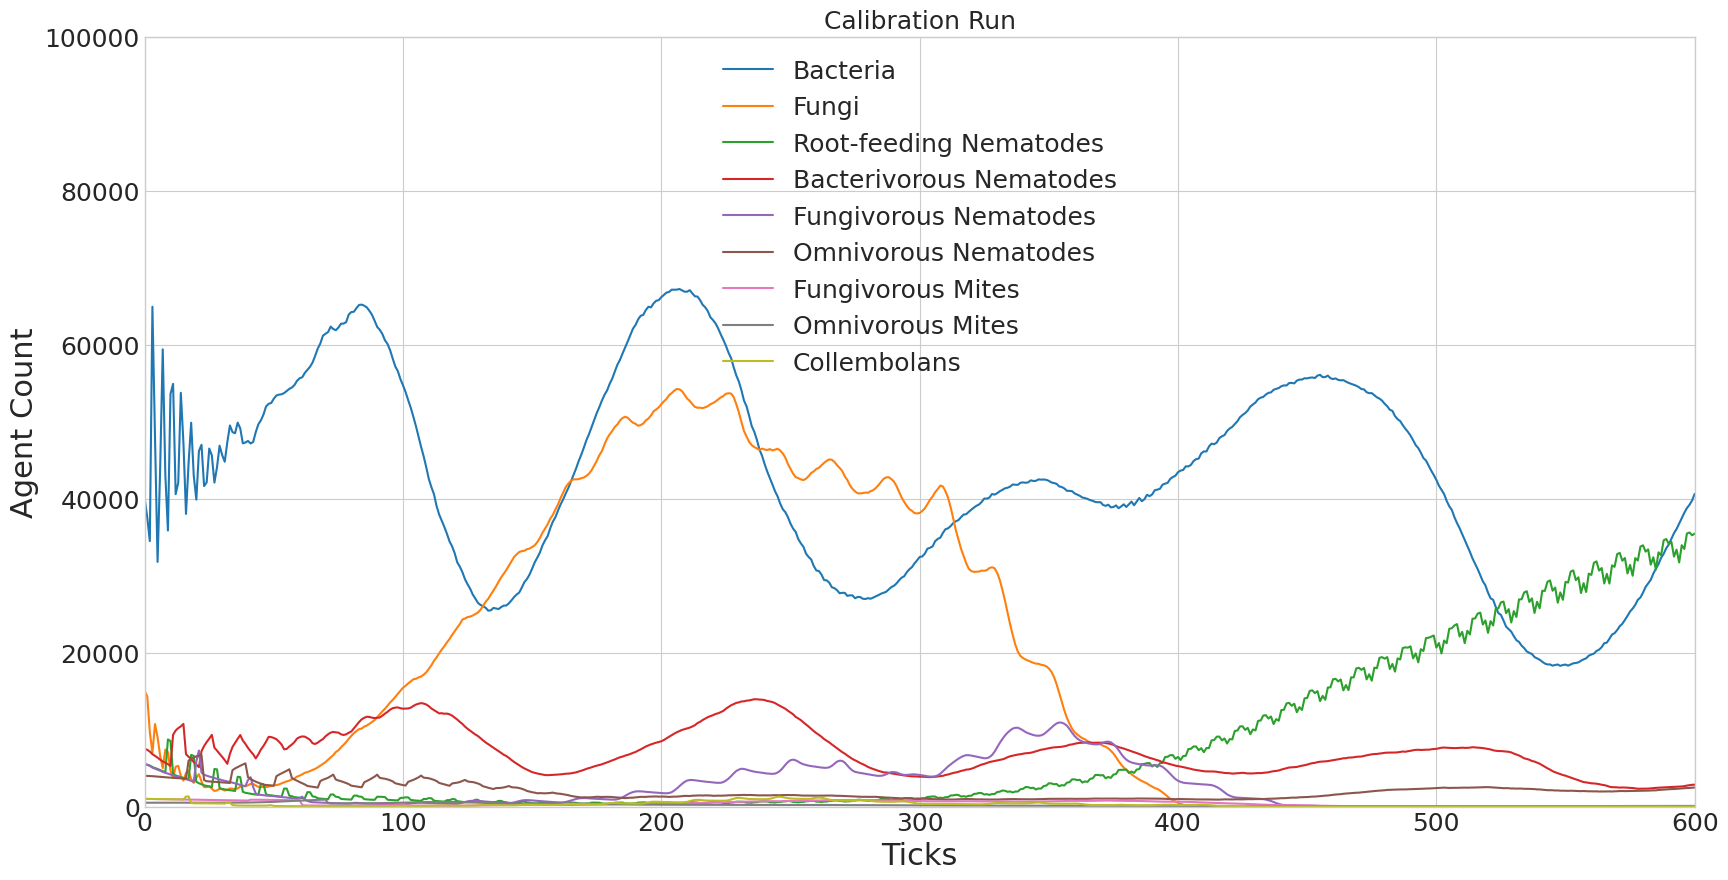

In [2]:
filename = 'random_1'
path = "../../blossom/hpc/outputs2/"

df = pd.read_csv(path + filename + ".csv")
colors = colormaps['tab10'].colors
counts_per_type = df.value_counts(['type', 'tick'])

organism_group_labels = ["Bacteria", "Fungi", "Root-feeding Nematodes", "Bacterivorous Nematodes", "Fungivorous Nematodes", "Omnivorous Nematodes", "Fungivorous Mites", "Omnivorous Mites", "Collembolans"]
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

for i in range(len(df['type'].unique())):
    plt.plot(
        range(len(df["tick"].unique())),
        counts_per_type[i].reindex(range(len(df['tick'].unique())), fill_value=0).sort_index().to_list(),
        label=organism_group_labels[i],
        color=colors[i]
    )
ax.set_xlim(0, 600)
ax.set_ylim(0, 100000)
ax.set_xlabel("Ticks")
ax.set_ylabel("Agent Count")
ax.set_title("Calibration Run")

plt.legend()
plt.savefig("./4-calibration.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [3]:
filenames = ['random_1', 'random_2', 'random_3', 'random_4', 'clustered_1', 'clustered_2', 'clustered_3', 'clustered_4']
path = "../../blossom/hpc/outputs2/"

organism_group_labels = ["Bacteria", "Fungi", "Root-feeding Nematodes", "Bacterivorous Nematodes", "Fungivorous Nematodes", "Omnivorous Nematodes", "Fungivorous Mites", "Omnivorous Mites", "Collembolans"]
dataset_labels = ['Locs: R, S: 1', 'Locs: R, S: 2', 'Locs: R, S: 3', 'Locs: R, S: 4', 'Locs: C, S: 1', 'Locs: C, S: 2', 'Locs: C, S: 3', 'Locs: C, S: 4']

# Line styles and colors reflecting combinations of variables
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':']  # Line style per seed type
colors = ['blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange']  # Color per init loc type

counts_per_types = [pd.read_csv(path + filename + ".csv").value_counts(['type', 'tick']) for filename in filenames]

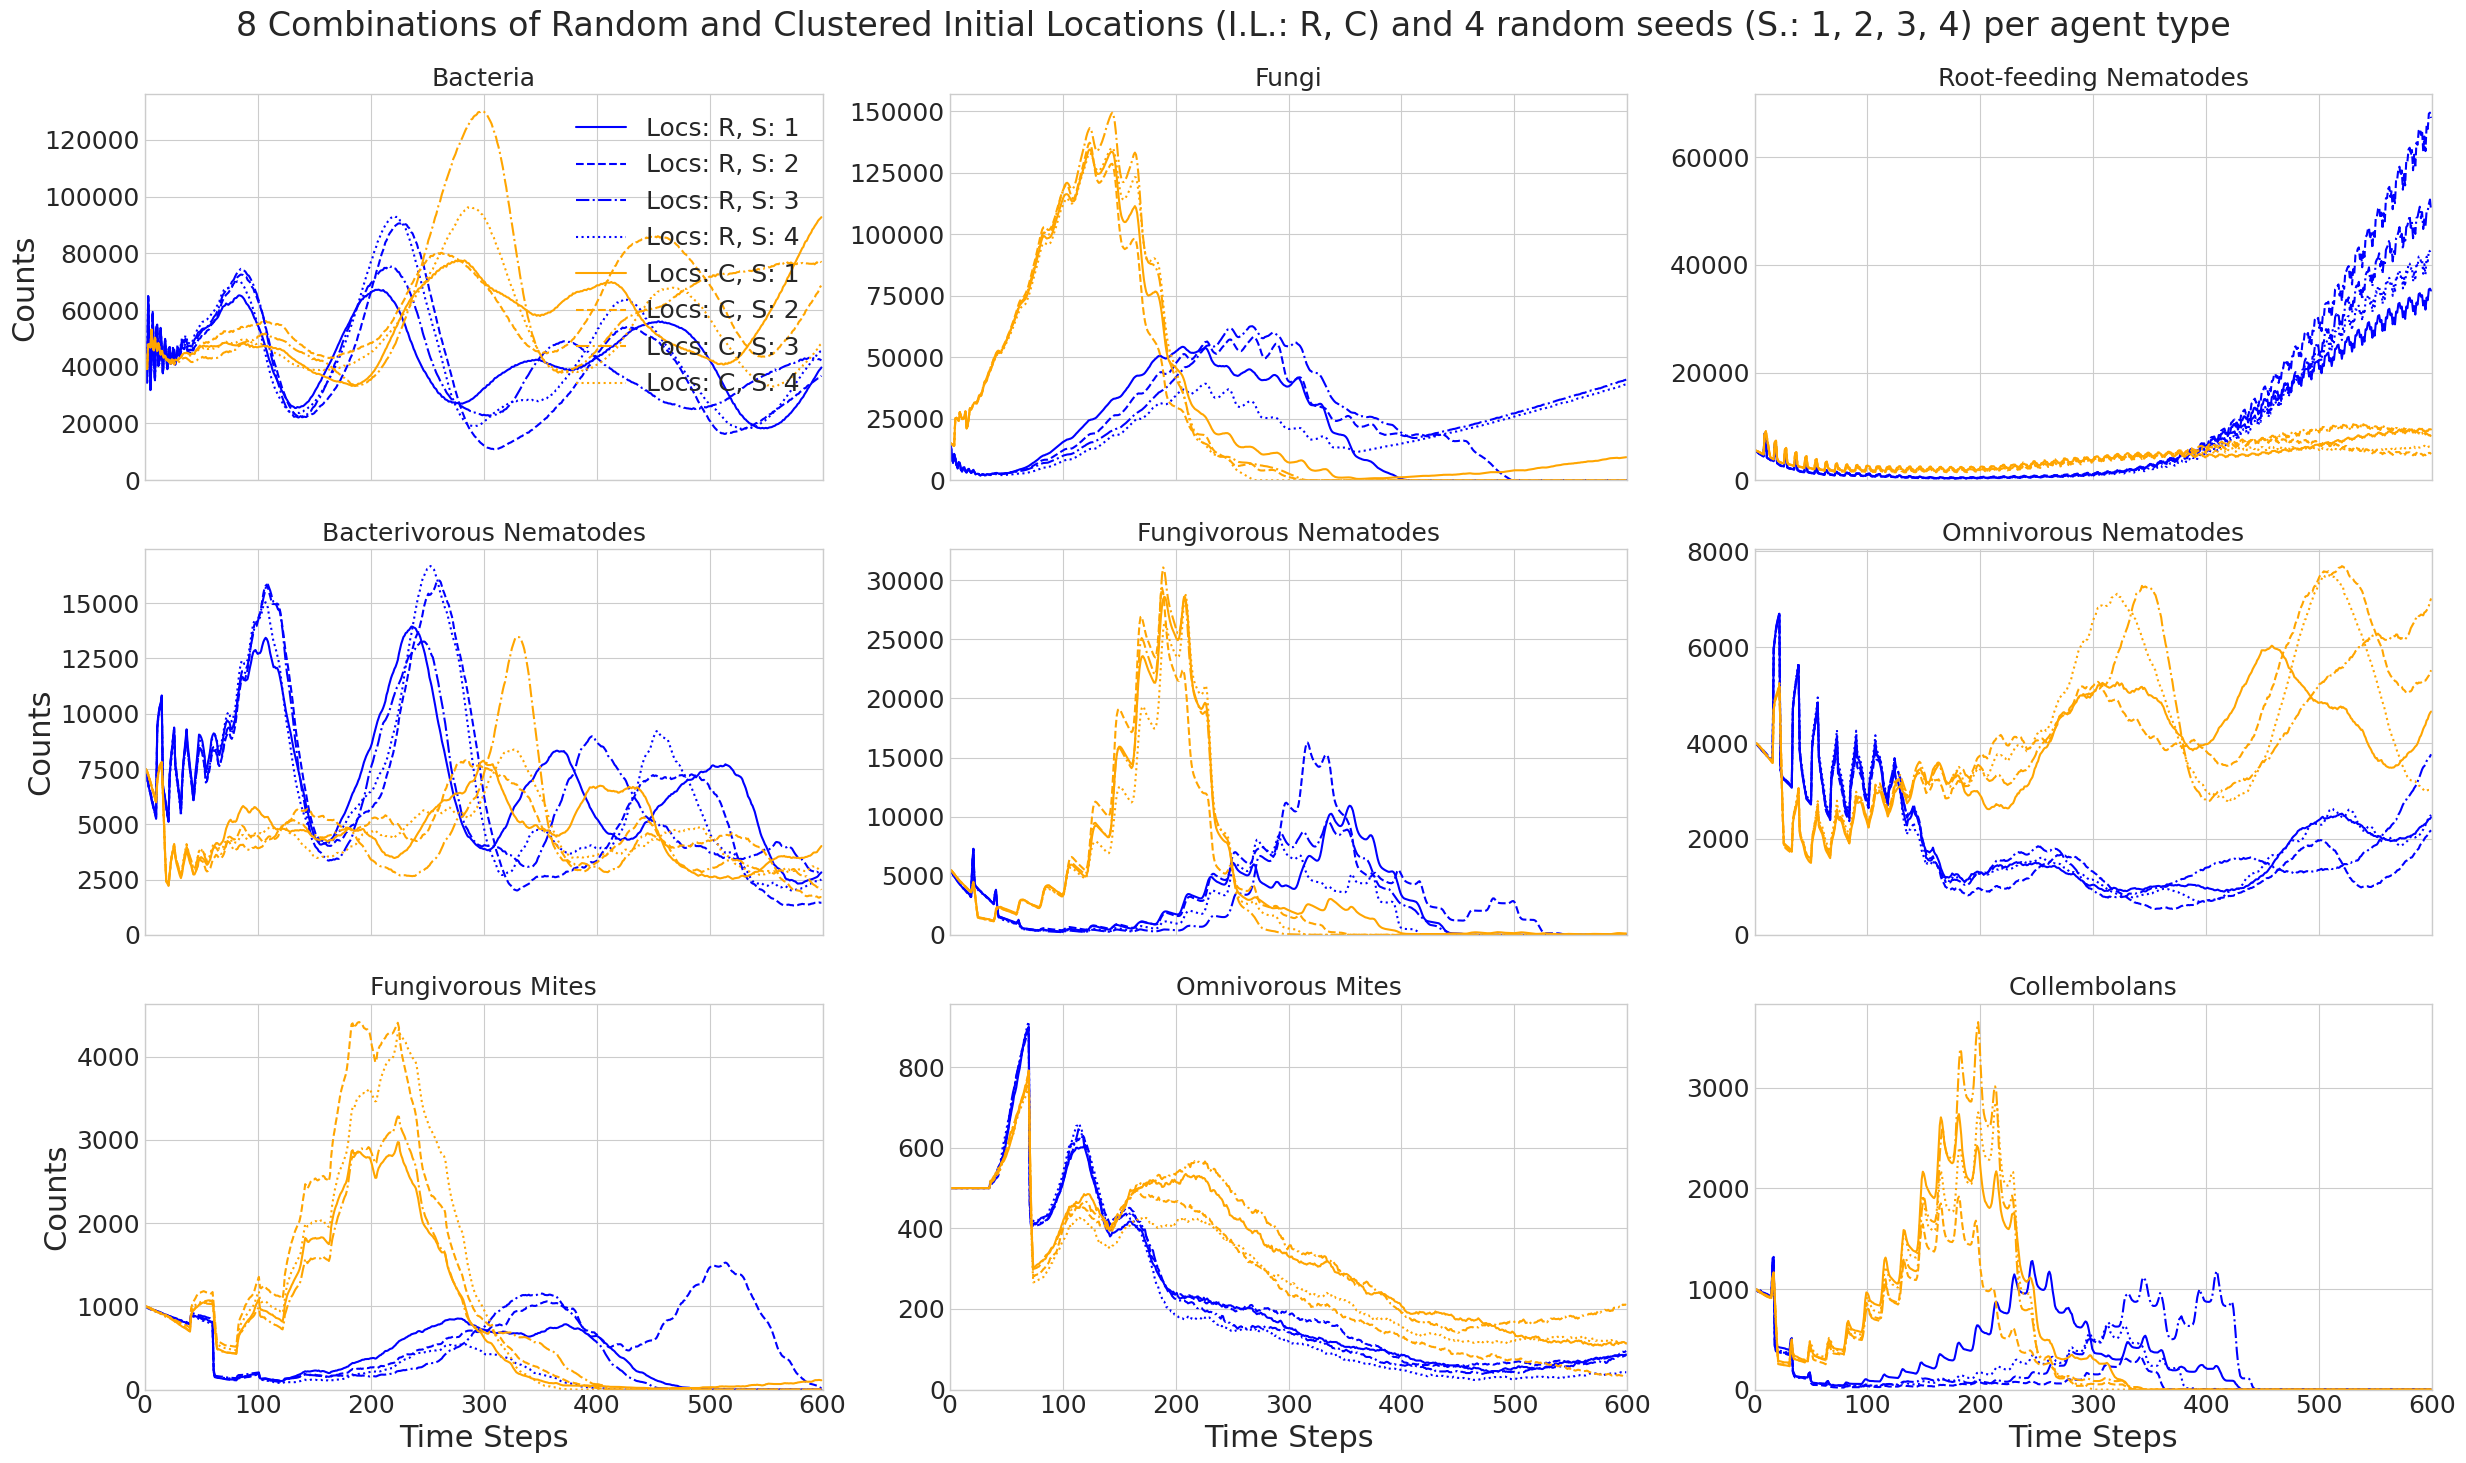

In [4]:
# Plot configuration
fig, axs = plt.subplots(3, 3, figsize=(25, 15))
fig.suptitle('8 Combinations of Random and Clustered Initial Locations (I.L.: R, C) and 4 random seeds (S.: 1, 2, 3, 4) per agent type')

# Loop through each type and create a subplot
for type_id in range(9):
    ax = axs[type_id // 3, type_id % 3]  # Determine subplot position
    for i, dataset in enumerate(counts_per_types):
        # Determine color and style based on the combination of variables
        color = colors[i // 2]  # Variable 1 controls the color
        style = line_styles[i % 2]  # Variable 2 controls the line style
        
        ax.plot(dataset[type_id].reindex(range(600), fill_value=0).sort_index().to_list(), label=dataset_labels[i], color=colors[i], linestyle=line_styles[i])
    
    ax.set_xlim(0, 600)
    ax.set_ylim(0)
    ax.set_title(organism_group_labels[type_id])
    if type_id in [0, 3, 6]:
        ax.set_ylabel('Counts')
    if type_id in [6, 7, 8]:
        ax.set_xlabel('Time Steps')
    else:
        ax.set_xticklabels([])
    if type_id == 0:
        ax.legend()

plt.tight_layout()  # Adjust layout to make room for the title
plt.savefig("./4-count-comp.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [5]:
filenames = ['random_1', 'random_2', 'random_1_2', 'random_2_2', 'clustered_1', 'clustered_2', 'clustered_1_2', 'clustered_2_2']
path = "../../blossom/hpc/outputs2/"

organism_group_labels = ["Bacteria", "Fungi", "Root-feeding Nematodes", "Bacterivorous Nematodes", "Fungivorous Nematodes", "Omnivorous Nematodes", "Fungivorous Mites", "Omnivorous Mites", "Collembolans"]
dataset_labels = ['IL: R1, S: 1', 'IL: R1, S: 2', 'IL: R2, S: 1', 'IL: R2, S: 2', 'IL: C1, S: 1', 'IL: C1, S: 2', 'IL: C2, S: 1', 'IL: C2, S: 2']

# Line styles and colors reflecting combinations of variables
line_styles = ['-', '--', '-', '--', '-', '--', '-', '--']  # Line style per seed
cm = colormaps['Set2'].colors
colors = [cm[0], cm[0], cm[1], cm[1], cm[2], cm[2], cm[3], cm[3],]  # Colors per init loc type

counts_per_types = [pd.read_csv(path + filename + ".csv").value_counts(['type', 'tick']) for filename in filenames]

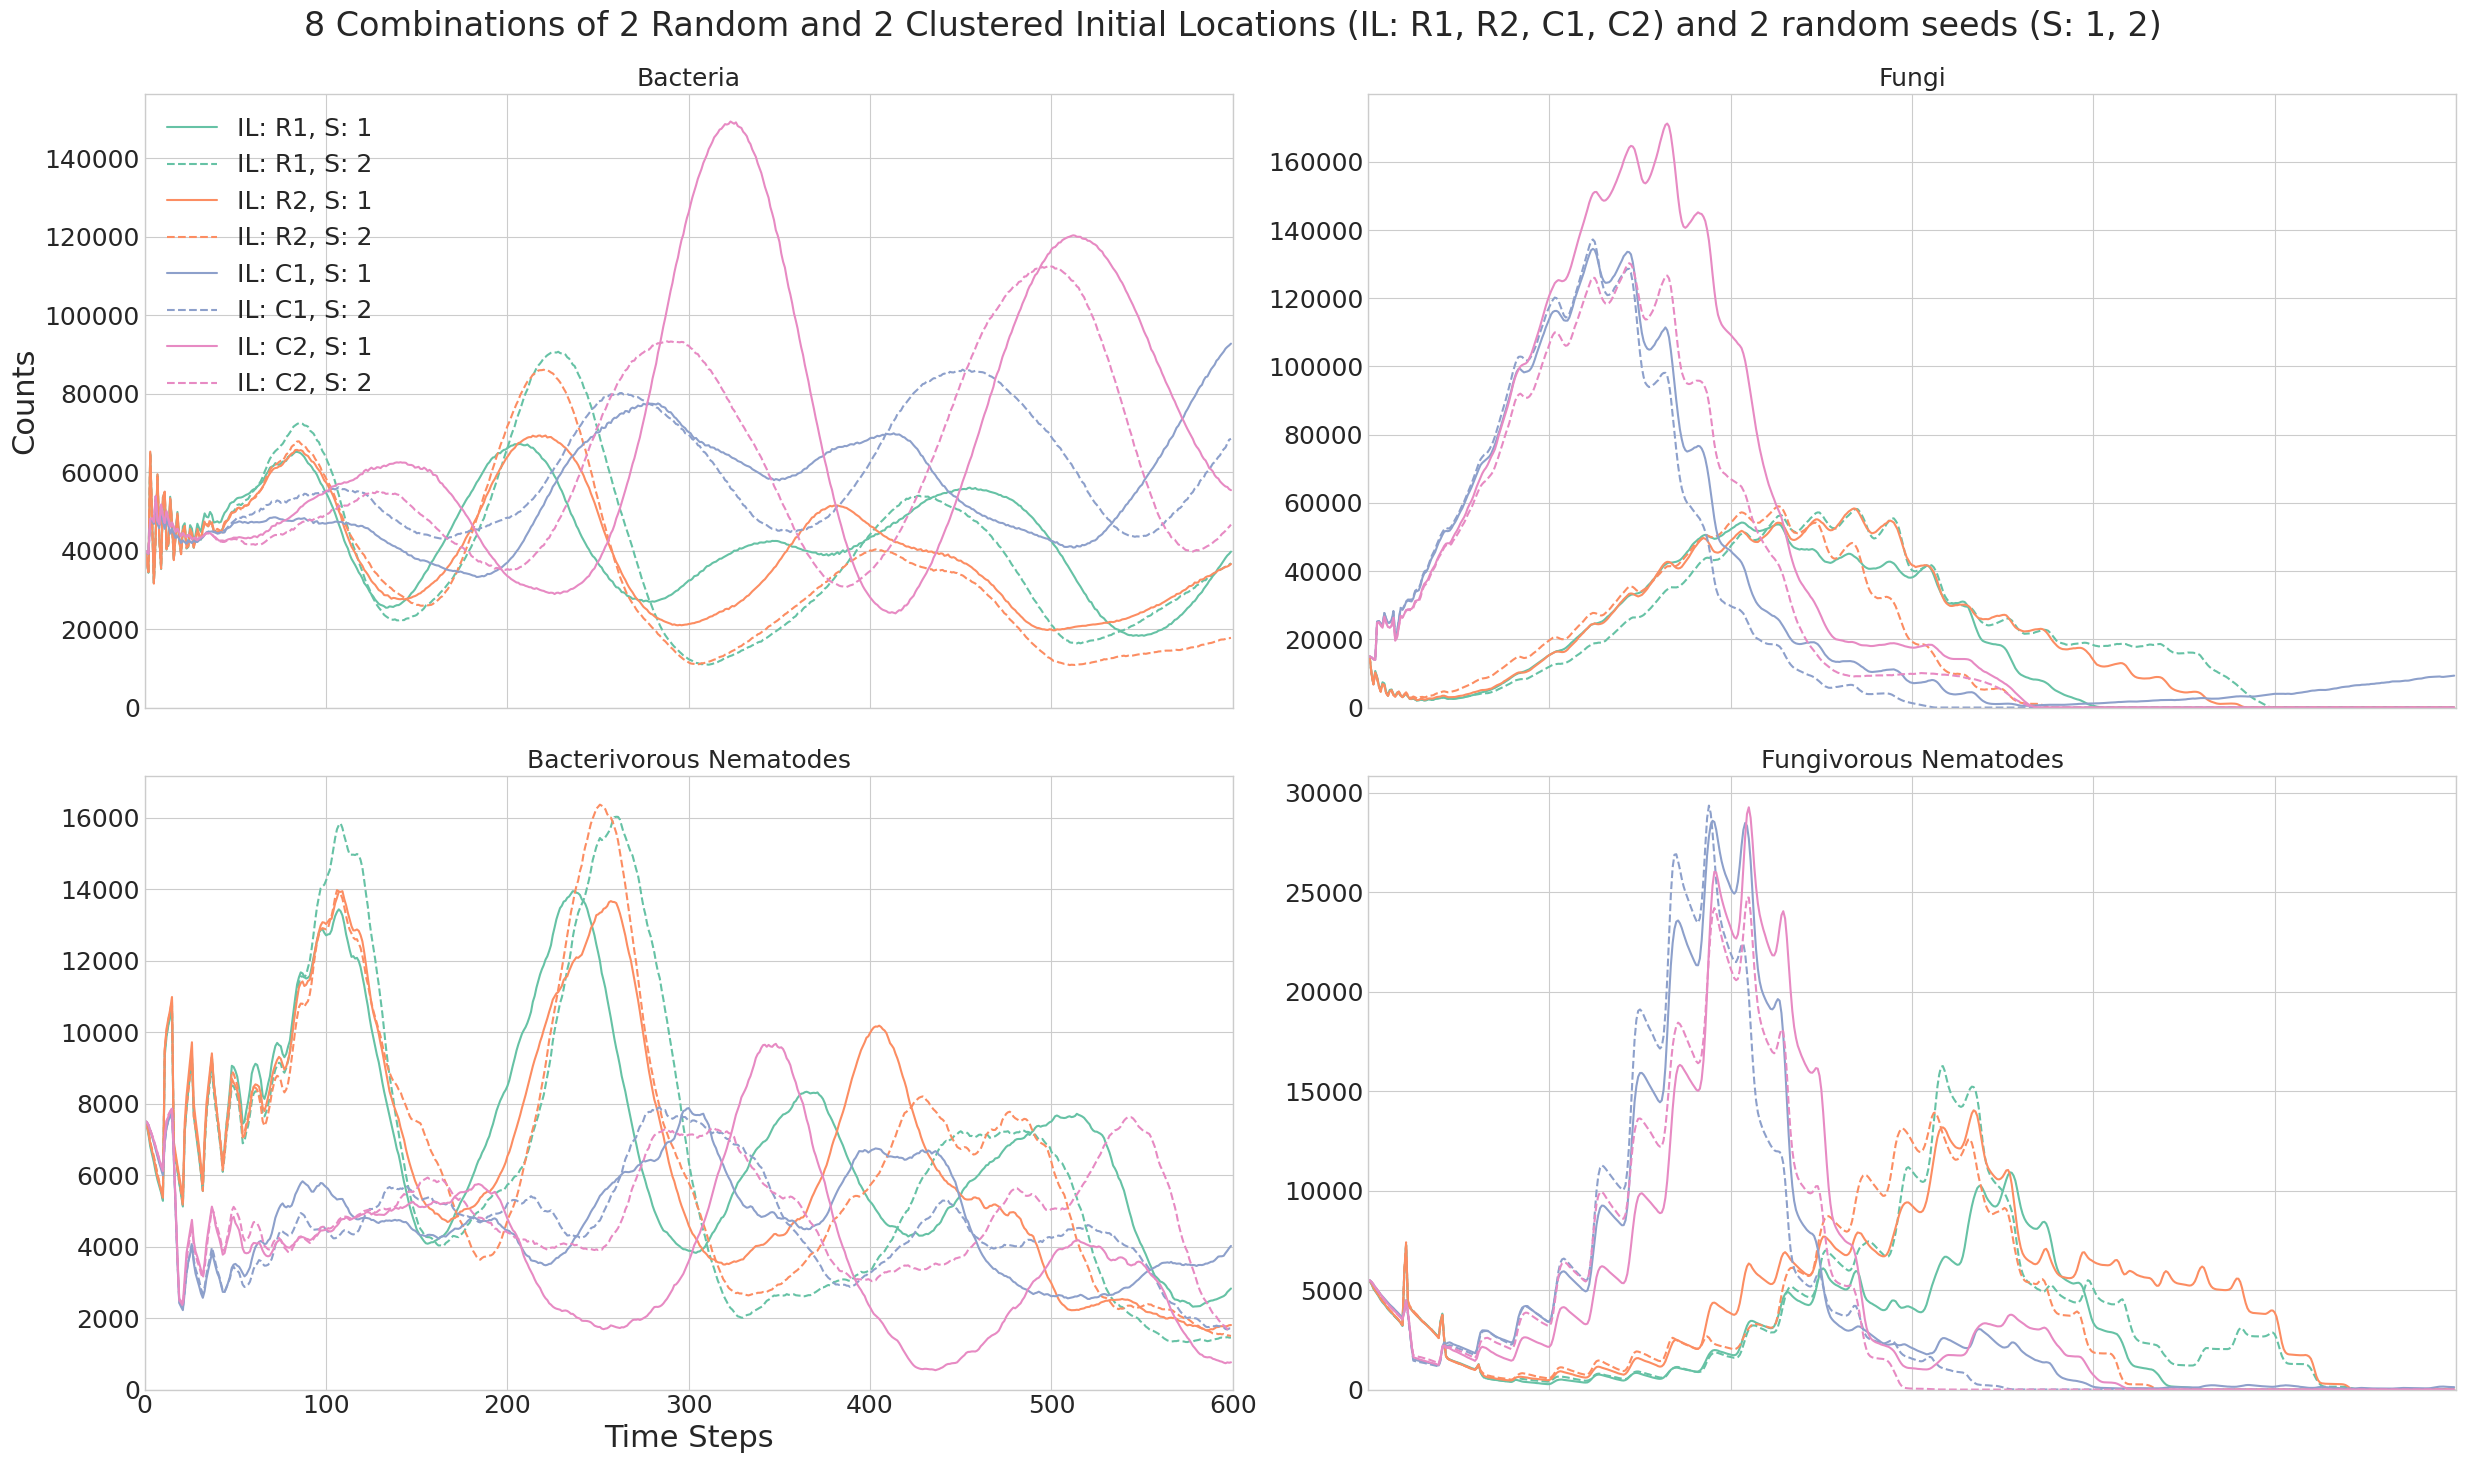

In [6]:
# Plot configuration
fig, axs = plt.subplots(2, 2, figsize=(25, 15))
fig.suptitle('8 Combinations of 2 Random and 2 Clustered Initial Locations (IL: R1, R2, C1, C2) and 2 random seeds (S: 1, 2)')

# Loop through each type and create a subplot
for type_id in range(9):
    if type_id in [2, 5, 6, 7, 8]:
        continue
    ax = axs[type_id // 3, type_id % 3]  # Determine subplot position
    for i, dataset in enumerate(counts_per_types):
        # Determine color and style based on the combination of variables
        color = colors[i // 2]  # Variable 1 controls the color
        style = line_styles[i % 2]  # Variable 2 controls the line style
        
        ax.plot(dataset[type_id].reindex(range(600), fill_value=0).sort_index().to_list(), label=dataset_labels[i], color=colors[i], linestyle=line_styles[i])
    
    ax.set_xlim(0, 600)
    ax.set_ylim(0)
    ax.set_title(organism_group_labels[type_id])
    if type_id in [0, 2]:
        ax.set_ylabel('Counts')
    if type_id in [2, 3]:
        ax.set_xlabel('Time Steps')
    else:
        ax.set_xticklabels([])
    if type_id == 0:
        ax.legend()

plt.tight_layout()  # Adjust layout to make room for the title
plt.savefig("./4-count-comp.pdf", format="pdf", bbox_inches="tight")
plt.show()
